In [1]:
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt

# Example: NonMarkovianMCSolver

Define a master equation with negative rates for a qubit

In [2]:
kappa = 1.0 / 0.129 # Coupling rate to heat bath
nth = 0.063         # Temperature with <n>=0.063

#Define the rate functions
def interval(t):  # coefficient function
    return (12 * np.exp(-2*t**3) * (-np.sin(15*t)**2) + kappa * (nth+1))
def interval2(t):  # coefficient function
    return (kappa * nth)

N = 2 # Hilbert space dimension
ntraj = 10000 # number of MC trajectories
tlist = np.linspace(0,1,101)

a0 = qt.destroy(N)
H = a0.dag() * a0  # Simple oscillator Hamiltonian
psi0 = qt.basis(N, 1)

e_ops = [a0.dag() * a0, a0 * a0.dag()]
ops_and_rates = []
ops_and_rates.append( [a0,       interval ] )
ops_and_rates.append( [a0.dag(), interval2] )

### Solve with NonMarkovianMCSolver

In [3]:
options = {'progress_bar': True, 'norm_steps': 10, 'map': 'parallel'}
solver = qt.NonMarkovianMCSolver(H, ops_and_rates, options=options)
MCSol = solver.run(psi0, tlist=tlist, ntraj=ntraj, e_ops=e_ops)

print()
print(MCSol)

10.0%. Run time:   2.47s. Est. time left: 00:00:00:22
20.0%. Run time:   4.85s. Est. time left: 00:00:00:19
30.0%. Run time:   7.26s. Est. time left: 00:00:00:16
40.0%. Run time:   9.72s. Est. time left: 00:00:00:14
50.0%. Run time:  12.18s. Est. time left: 00:00:00:12
60.0%. Run time:  14.65s. Est. time left: 00:00:00:09
70.0%. Run time:  17.22s. Est. time left: 00:00:00:07
80.0%. Run time:  19.73s. Est. time left: 00:00:00:04
90.0%. Run time:  22.24s. Est. time left: 00:00:00:02
100.0%. Run time:  24.76s. Est. time left: 00:00:00:00
Total run time:  24.77s

<NmmcResult
  Solver: nm_mcsolve
  Solver stats:
    method: 'adams'
    init time: 0.00018072128295898438
    preparation time: 0.06366276741027832
    run time: 24.771674156188965
    solver: 'Master Equation Evolution'
    num_collapse: 2
    end_condition: 'ntraj reached'
  Time interval: [0.0, 1.0] (101 steps)
  Number of e_ops: 2
  State not saved.
  Number of trajectories: 10000
  Trajectories not saved.
>


### Solve with mesolve

In [4]:
d_ops = []
d_ops.append([qt.lindblad_dissipator(a0, a0), interval])
d_ops.append(np.sqrt(kappa * nth) * a0.dag())

MESol = qt.mesolve(H, psi0, tlist, d_ops, e_ops, options={'progress_bar': False})

### Compare

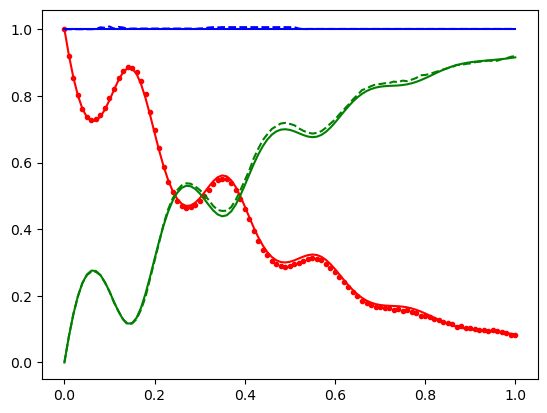

In [5]:
plt.plot(tlist, MCSol.expect[0], 'r.')
plt.plot(tlist, MCSol.expect[1], 'g--')
plt.plot(tlist, MCSol.trace, 'b--')

plt.plot(tlist, MESol.expect[0], 'r')
plt.plot(tlist, MESol.expect[1], 'g')
plt.plot(tlist, np.ones(len(tlist)), 'b')

plt.show()

### Test completeness check

The Lindblad operators used above already satisfy the completeness relation. We will now do the same calculation using Lindblad operators that do not.

In [6]:
def interval2_2(t):  # coefficient function
    return 4 * (kappa * nth)

ops_and_rates2 = []
ops_and_rates2.append( [a0,       interval ] )
ops_and_rates2.append( [a0.dag() / 2, interval2_2] )

solver2 = qt.NonMarkovianMCSolver(H, ops_and_rates2, options=options)
MCSol2 = solver2.run(psi0, tlist=tlist, ntraj=ntraj, e_ops=e_ops)

print()
print(MCSol2)

10.0%. Run time:   3.15s. Est. time left: 00:00:00:28
20.0%. Run time:   6.18s. Est. time left: 00:00:00:24
30.0%. Run time:   9.31s. Est. time left: 00:00:00:21
40.0%. Run time:  12.68s. Est. time left: 00:00:00:19
50.0%. Run time:  15.96s. Est. time left: 00:00:00:15
60.0%. Run time:  19.36s. Est. time left: 00:00:00:12
70.0%. Run time:  22.64s. Est. time left: 00:00:00:09
80.0%. Run time:  25.90s. Est. time left: 00:00:00:06
90.0%. Run time:  29.14s. Est. time left: 00:00:00:03
100.0%. Run time:  32.37s. Est. time left: 00:00:00:00
Total run time:  32.39s

<NmmcResult
  Solver: nm_mcsolve
  Solver stats:
    method: 'adams'
    init time: 0.0001163482666015625
    preparation time: 0.0965433120727539
    run time: 32.39173412322998
    solver: 'Master Equation Evolution'
    num_collapse: 3
    end_condition: 'ntraj reached'
  Time interval: [0.0, 1.0] (101 steps)
  Number of e_ops: 2
  State not saved.
  Number of trajectories: 10000
  Trajectories not saved.
>


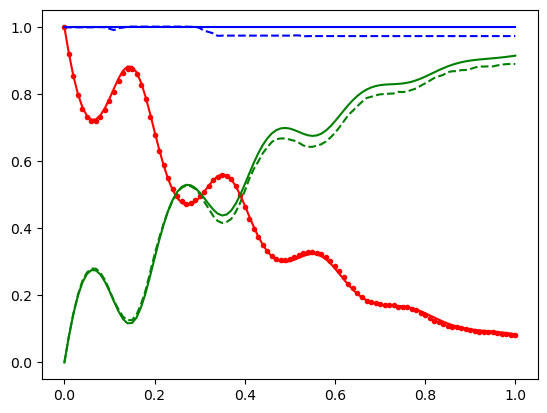

In [7]:
plt.plot(tlist, MCSol2.expect[0], 'r.')
plt.plot(tlist, MCSol2.expect[1], 'g--')
plt.plot(tlist, MCSol2.trace, 'b--')

plt.plot(tlist, MESol.expect[0], 'r')
plt.plot(tlist, MESol.expect[1], 'g')
plt.plot(tlist, np.ones(len(tlist)), 'b')

plt.show()

In [8]:
from qutip.ipynbtools import version_table

version_table()

Software,Version
QuTiP,5.0.0.dev0+f013a4f
Numpy,1.23.5
SciPy,1.9.3
matplotlib,3.6.2
Cython,0.29.32
Number of CPUs,16
BLAS Info,INTEL MKL
IPython,8.8.0
Python,"3.10.9 (main, Jan 11 2023, 15:21:40) [GCC 11.2.0]"
OS,posix [linux]
